# UTKML Twitter Spam Detection Competition Dataset

In [73]:
dataset = "UTKML Twitter Spam Detection Competition Dataset"

In [74]:
import warnings 
warnings.filterwarnings('ignore')

In [75]:
import pandas as pd

In [76]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv')

In [77]:
data.sample(5)

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
8082,Look what's appeared on our official @Snapchat...,378000.0,11200000.0,759.0,0.0,"Anfield, Liverpool",Quality,NaN
9296,personally I think junior hockey on the whole ...,0.0,0.0,0.0,0.0,"New York, NY",Quality,NaN
1642,"Awesome, one of my 3D models will be featured ...",0.0,0.0,12.0,0.0,"Amsterdam, The Netherlands",Quality,NaN
11951,RT grammy620: Definitely. Both parties have do...,979.0,122.0,88.0,0.0,"Doncaster, England",Spam,NaN
6292,#baby Autumn winter baby hat boy girl skullies...,0.0,0.0,0.0,0.0,NaN,Quality,NaN


In [78]:
data.shape

(14899, 8)

In [79]:
data.describe()

,following,followers,actions,is_retweet
count,1.474100e+04,1.488200e+04,11462.000000,14898.000000
mean,4.696292e+03,3.534459e+05,6991.949311,0.249765
std,3.189653e+04,3.890453e+06,15803.881463,0.432892
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,13.000000,0.000000
50%,7.400000e+01,8.030000e+02,1495.500000,0.000000
75%,3.025000e+03,1.304975e+04,6692.500000,0.000000
max,1.600000e+06,1.050000e+08,165599.000000,1.000000


In [80]:
data.isna().sum()

Tweet             0
following       158
followers        17
actions        3437
is_retweet        1
location       2011
Type              0
Unnamed: 7    14897
dtype: int64

In [81]:
data.nunique()

Tweet         14682
following      4574
followers      5483
actions        6063
is_retweet        2
location       3437
Type              3
Unnamed: 7        2
dtype: int64

In [82]:
data.drop(columns=['Unnamed: 7'], inplace=True)

In [83]:
data['TEXT'] = None

In [84]:
data = data.drop(columns=['following','followers','actions','is_retweet','location'])

In [85]:
data.nunique()

Tweet    14682
Type         3
TEXT         0
dtype: int64

In [86]:
print(data['Type'].unique())

['Quality' 'Spam' 'South Dakota']


In [87]:
value_to_filter = 'South Dakota'
data = data[data['Type'] != value_to_filter]

In [88]:
data.nunique()

Tweet    14680
Type         2
TEXT         0
dtype: int64

In [89]:
print(data['Type'].unique())

['Quality' 'Spam']


In [90]:
from Preprocessor import preprocess

In [91]:
field = "Tweet"

In [92]:
data

,Tweet,Type,TEXT
0,Good Morning Love @LeeBrown_V,Quality,None
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,None
2,Haven't been following the news but I understa...,Quality,None
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,None
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,None
...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",Spam,None
14895,"They don't have to like you, and you don't hav...",Quality,None
14896,#Miami Graham Nash Live at Parker Playhouse #...,Spam,None
14897,@bethannhamilton is in the business of one-upp...,Quality,None


In [93]:
print(data[field][7550:7560])

7550    '@DocDarnell #WhenIWasYoung I never needed any...
7551    He points out Smich mentions throwing someone ...
7553    Highlights from First Presidential Debate http...
7554    #business Pilots for DHL carriers holding stri...
7555    The celebration continues! Park Hours: Disneyl...
7556    Heres what you need to know about the Eric Tru...
7557          No-one wears the white hat anymore #Scandal
7558             Hello you cuntpic.twitter.com/H2Sho3ZBgy
7559    Trump had a human excuse machine last night: P...
7560    San Mateo car crash leaves at least 1 dead htt...
Name: Tweet, dtype: object


In [94]:
for i in range(len(data)):
    data['TEXT'][i] = preprocess(data[field].iloc[i])

In [96]:
data['CLASS']=None
for i in range(len(data)):
    if data['Type'].iloc[i]=="Spam":
        data['CLASS'].iloc[i]=0
    else:
        data['CLASS'].iloc[i]=1

In [97]:
data.sample(5)

,Tweet,Type,TEXT,CLASS
10529,Already making weekend planspic.twitter.com/h6...,Quality,blackpressday import day histori cultur,1
5585,VIDEO : Maxine Waters Says Trump is RACIST for...,Spam,video maxin water say trump racist want immigr...,0
1390,Hurricane Harvey: Get down for a good cause at...,Spam,hurrican harvey get good caus front rang benef...,0
14795,Congrats to all the hard working writers who a...,Quality,zasiiier snorlaxp twitter com yzzlvbocna,1
7691,"#PoliceAMovie 1,000,000 Years PC",Spam,anatom museum launch anatomi app http www ed a...,0


In [98]:
data.isna().sum()

Tweet    0
Type     0
TEXT     2
CLASS    0
dtype: int64

In [99]:
data = data.drop(columns=['Tweet', 'Type'])

In [100]:
data.sample(5)

,TEXT,CLASS
9745,old trafford bomb scare fan return manchest un...,1
8074,ask rais two week howtoloseyourjob,0
5648,cant wait payday,1
3688,ever get realli good hug someon like wait hug,1
8973,tiffani win sb mtv show today congrat tiffani ...,0


In [101]:
data.to_csv(f'../Datasets/Preprocessed/{dataset}/data.csv') 

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

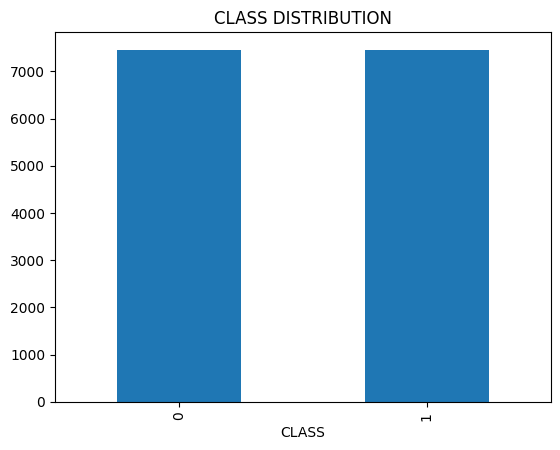

In [103]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

In [110]:
data.dropna(inplace=True)

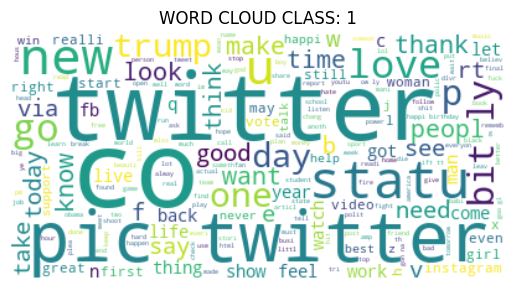

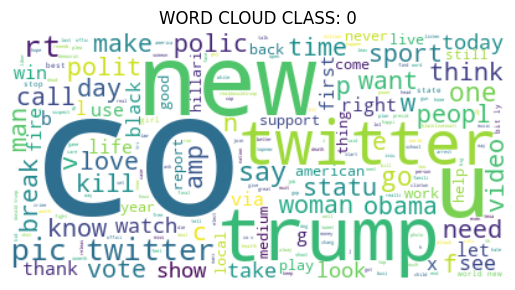

In [111]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()